In [1]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import minimize


In [2]:

def kriging(X, y, x_pred):
    # Calcular la matriz de distancias
    D = squareform(pdist(X))
    
    # Función para calcular la matriz de autocovarianza
    def autocov(theta, D):
        n = D.shape[0]
        A = np.zeros((n, n))
        for i in range(n):
            for j in range(i, n):
                A[i, j] = np.exp(-theta * D[i, j])
                A[j, i] = A[i, j]
        return A
    
    # Función objetivo para minimizar
    def objective(theta):
        A = autocov(theta, D)
        y_pred = np.dot(np.dot(np.linalg.inv(A), y), np.ones(n))
        residuals = y - y_pred
        return np.dot(residuals, residuals)
    
    n = X.shape[0]
    initial_guess = np.ones(n)
    result = minimize(objective, initial_guess)
    theta = result.x
    
    # Calcular la matriz de autocovarianza para los puntos conocidos
    A = autocov(theta, D)
    y_pred = np.dot(np.dot(np.linalg.inv(A), y), np.ones(n))
    
    # Calcular la matriz de covarianza para los puntos conocidos y desconocidos
    D_pred = squareform(pdist(np.vstack((X, x_pred))))
    C = np.zeros((n+1, n+1))
    for i in range(n+1):
        for j in range(i, n+1):
            C[i, j] = np.exp(-theta * D_pred[i, j])
            C[j, i] = C[i, j]
    
    # Calcular la estimación de kriging para el punto desconocido
    y_kriging = np.dot(np.dot(C[:n, n], np.linalg.inv(A)), y_pred)
    
    return y_kriging

    



In [5]:
X = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [9, 10]])
y = np.array([5, 7, 9, 11, 13])
x_pred = np.array([[6, 7]])

result = kriging(X, y, x_pred)

ValueError: setting an array element with a sequence.

C:\Users\seramos\AppData\Local\Temp\ipykernel_13384\2604969823.py:44: RuntimeWarning: invalid value encountered in sqrt
  plt.fill_between(X_pred.ravel(), y_pred - 2 * np.sqrt(y_var), y_pred + 2 * np.sqrt(y_var), alpha=0.5)


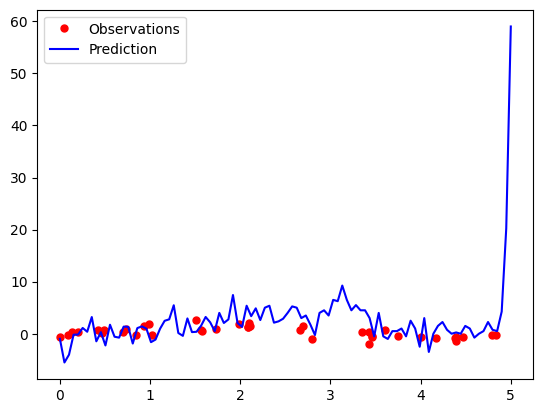

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def kriging(X, y, x_pred, theta=1.0):
    # Calculate covariance matrix between all data points
    n = X.shape[0]
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            C[i, j] = theta * np.exp(-np.sum((X[i, :] - X[j, :]) ** 2) / 2)

    # Solve the linear system to find weights
    w = np.linalg.solve(C, y)

    # Calculate the variance of the prediction
    y_pred = 0
    var_pred = theta
    for i in range(n):
        d = x_pred - X[i, :]
        k = theta * np.exp(-np.sum(d ** 2) / 2)
        y_pred += w[i] * k
        var_pred -= k ** 2

    return y_pred, var_pred

# Generate sample data
np.random.seed(1)
X = 5 * np.random.rand(40, 1)
y = np.sin(X).ravel()
dy = 0.5 + 1.0 * np.random.rand(X.shape[0])
noise = np.random.normal(0, dy)
y += noise

# Predict values for unseen data
X_pred = np.linspace(0, 5, 100)[:, np.newaxis]
y_pred = np.zeros(X_pred.shape[0])
y_var = np.zeros(X_pred.shape[0])
for i in range(X_pred.shape[0]):
    y_pred[i], y_var[i] = kriging(X, y, X_pred[i, :])

# Plot the results
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(X_pred, y_pred, 'b-', label='Prediction')
plt.fill_between(X_pred.ravel(), y_pred - 2 * np.sqrt(y_var), y_pred + 2 * np.sqrt(y_var), alpha=0.5)
plt.legend()
plt.show()


In [ ]:
import numpy as np

def kriging(X, y, x_pred, theta=1.0):
    # Calculate covariance matrix between all data points
    n = X.shape[0]
    C = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            C[i, j] = theta * np.exp(-np.sum((X[i, :] - X[j, :]) ** 2) / 2)

    # Solve the linear system to find weights
    w = np.linalg.solve(C, y)

    # Calculate the prediction as a weighted sum
    y_pred = 0
    for i in range(n):
        k = theta * np.exp(-np.sum((x_pred - X[i, :]) ** 2) / 2)
        y_pred += w[i] * k

    return y_pred

# Generate sample data
np.random.seed(1)
X = 5 * np.random.rand(40, 1)
y = np.sin(X).ravel()
dy = 0.5 + 1.0 * np.random.rand(X.shape[0])
noise = np.random.normal(0, dy)
y += noise

# Predict values for unseen data
x_pred = np.array([2.5])
y_pred = kriging(X, y, x_pred)

print("Prediction at x = 2.5:", y_pred)
